#**Final Project 2**
##Group 1


*   Reynaldi Ananda Putra / PYTN-KS20-014
*   Reva Fahrian Natamenggala / PYTN-KS20-017
*   Desmonda Zefanya Namora Putri Manurung / PYTN-KS20-024

# Introduction

Rain forecasting is very important because heavy and irregular rain can have many impacts like destruction of crops and farms or damage of property. A better forecasting model is essential for an early warning that can minimize risks to life and property and manage the agricultural farms in better way. However, rain prediction is a challenging task and the results should be accurate. By having historical data, machine learning can be used to predict rain accurately for future seasons. Different techniques produce different accuracies, so it's important to choose the right algorithms such as logistic regression and SVM.

Note:


*   The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) with 145,460 rows and 23 columns


# Import Libraries

In [ ]:
# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
!pip install dython
from dython.nominal import associations

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Modeling
!pip install scikit-learn --upgrade
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load

# Settings
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])

# Data Loading

Import *weatherAUS.csv* as *df*.

In [ ]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Check the shape of the dataset which has 145,460 rows and 23 columns.

In [ ]:
df.shape

(145460, 23)

# Data Cleaning

Show the amount of *NaN* Values

In [ ]:
pd.DataFrame({
    "type": df.dtypes.values,
    "null": df.isnull().sum().values,
}).set_index(df.isnull().sum().index).sort_values(by='null', ascending=False)

,type,null
Sunshine,float64,69835
Evaporation,float64,62790
Cloud3pm,float64,59358
Cloud9am,float64,55888
Pressure9am,float64,15065
Pressure3pm,float64,15028
WindDir9am,object,10566
WindGustDir,object,10326
WindGustSpeed,float64,10263
Humidity3pm,float64,4507


Since its not a time series analysis so we can drop the date column and its shown that *Sunshine*, *Evaporation*, *Cloud3pm*, and *Cloud9am* features have lots of *NaN* values. Replacing those might increase the inaccuracy of the dataset. so, we can just drop it instead.

In [ ]:
df = df.drop(columns=['Date'])
df.drop(columns = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'],inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Specify which features are categorical and numerical.

In [ ]:
cat_cols = df.columns[df.dtypes == object]
num_cols = df.columns[df.dtypes != object]

print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)

Categorical Columns:  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')
Numerical Columns:  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


Replace *NaN* values in categorical and numerical features with their modes and means respectively.

In [ ]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

for i in num_cols:
    df[i].fillna(df[i].mean(), inplace=True)

df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Detect and visualize outliers for each numerical feature using box plot. As it can be seen, there are lots of outliers.

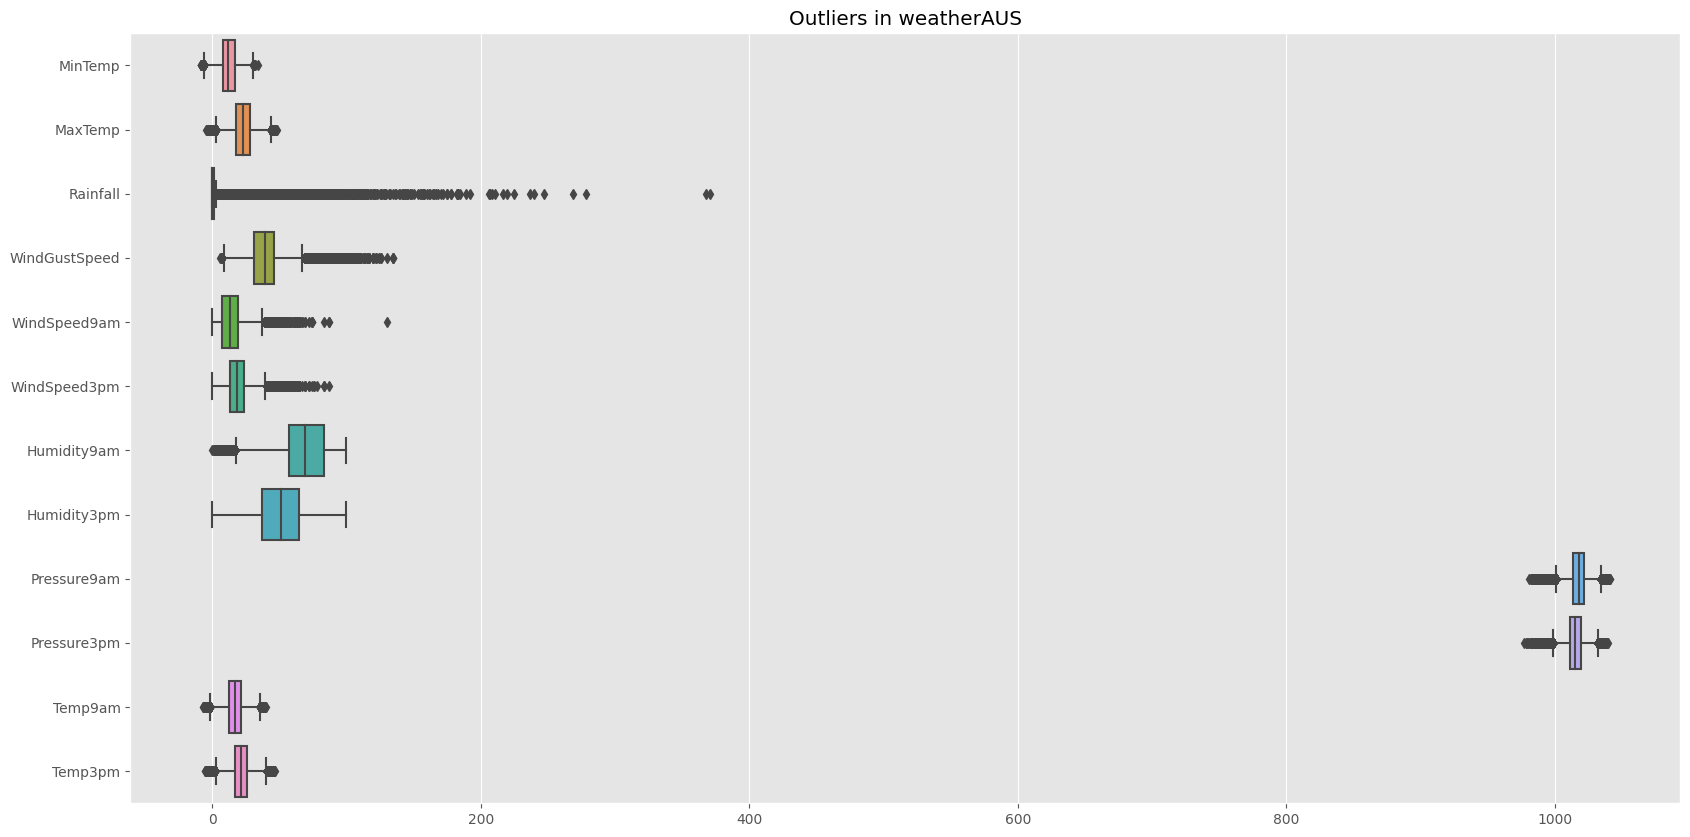

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="h")
plt.title("Outliers in weatherAUS")
plt.show()

Remove outliers by only taking the values that are within the upper and lower limits.

In [ ]:
for i in num_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[i] > lower) & (df[i] < upper)]

Detect and visualize outliers for the 2nd time. As it can be seen, although *rainfall* feature still has a few outliers, overall it's much better than it was. Also, remove outliers in *rainfall* feature will reduce the size of the dataset significantly, so we'll leave as it is now.

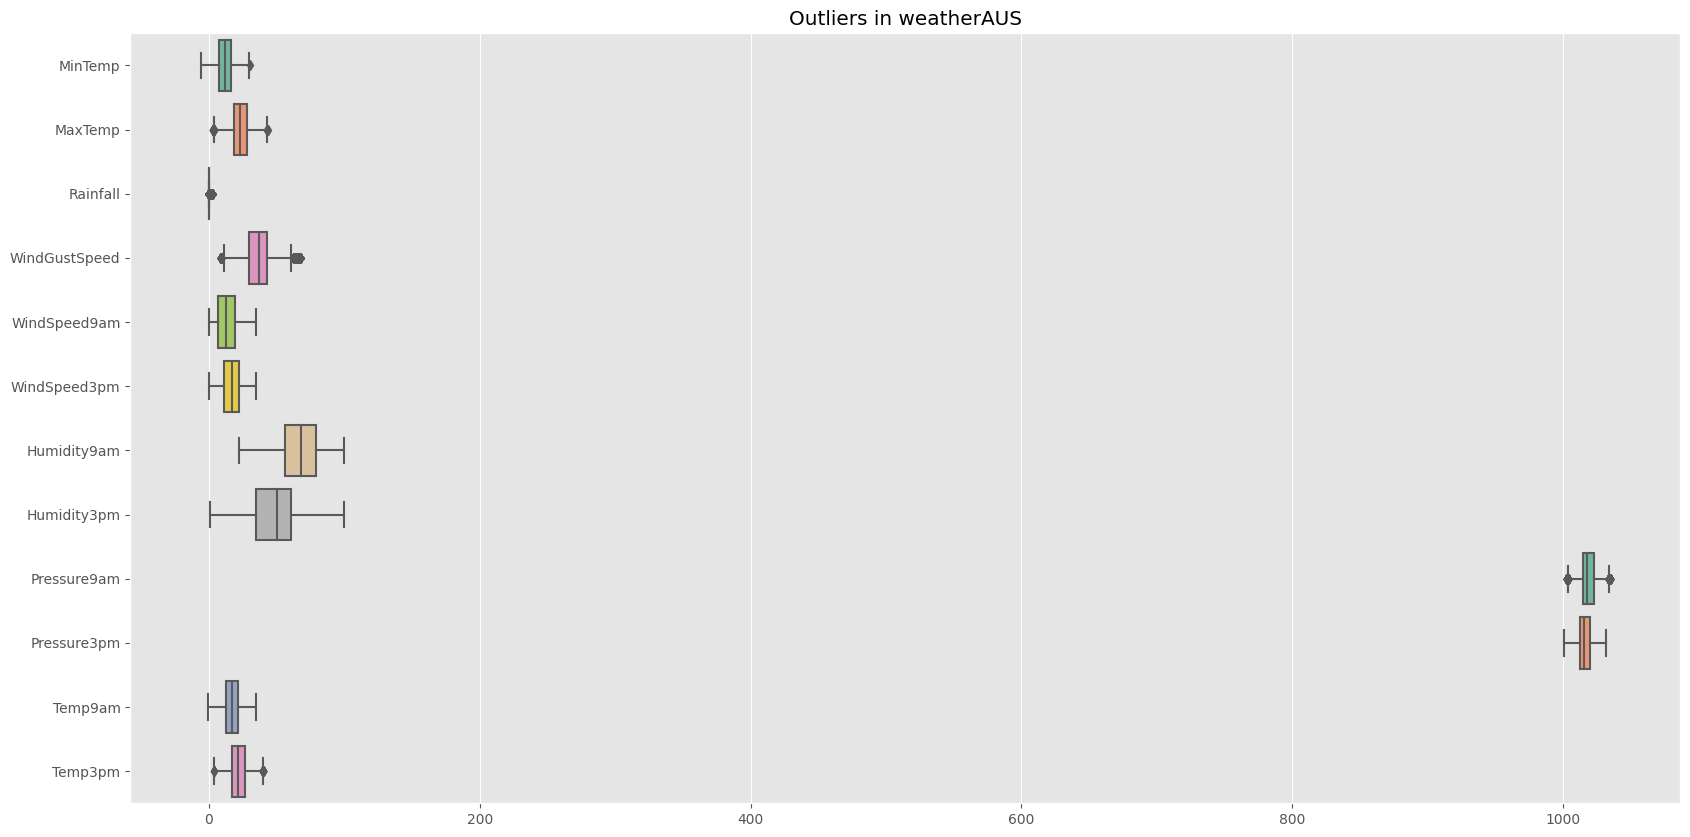

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Outliers in weatherAUS")
plt.show()

Find the correlation between numerical and categorical features with the help of *dython* library.

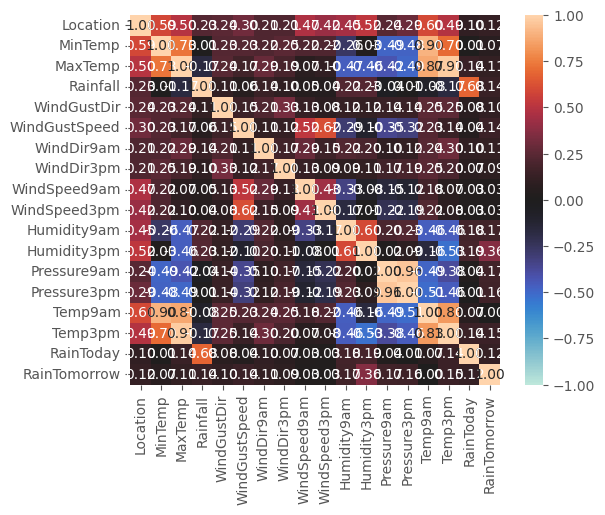

In [ ]:
corr = associations(df)

Since we want to know which features that influence *raintomorrow* the most, we'll sort the correlation coefficients in descending order.

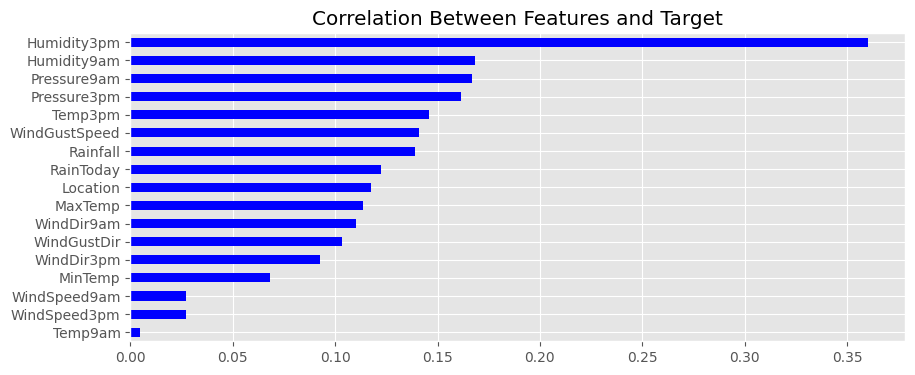

In [ ]:
fig = plt.figure(figsize=(10, 4))

corr["corr"][["RainTomorrow"]].iloc[:-1].sort_values("RainTomorrow").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca(),
    color='blue'
)

plt.show()

As it can be seen from the plot above, *windspeed9am*, *windspeed3pm*, and *temp9am* features have the least influence on *raintomorrow* and thus those features can be dropped.

In [ ]:
drop_cols = corr['corr']['RainTomorrow'].sort_values().iloc[:3].index
df = df.drop(columns=drop_cols)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,29.7,No,No


The cleaned dataset now has 109,828 rows and 15 columns.

In [ ]:
df.shape

(109828, 15)

# Data Exploration

See how often it rains by visualizing both *raintoday* and *raintomorrow*. As it can be seen, the dataset isn't evenly distributed within these 2 classes.

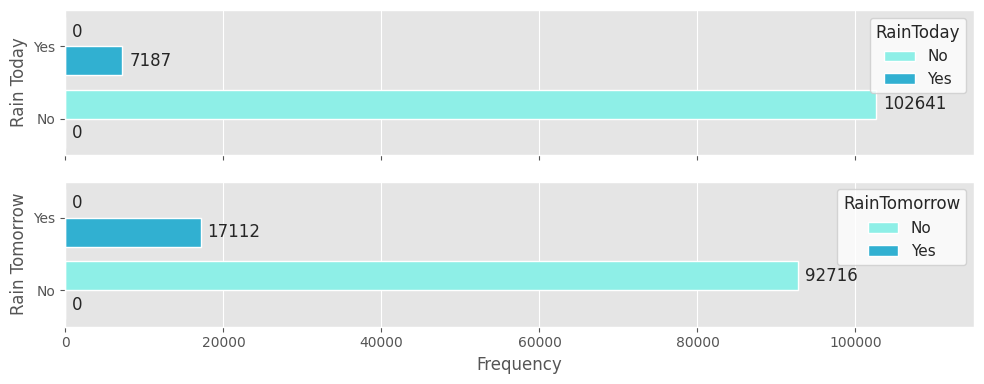

In [ ]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),nrows=nrows,ncols=ncols,sharex=True)
sns.set_theme(style="white")
sns.color_palette("bright")
for i,j,k in zip(range(nrows),["RainToday","RainTomorrow"],["Rain Today","Rain Tomorrow"]):
    countplot = sns.countplot(data=df,y=j,palette=["#7efff5","#17c0eb"],hue = j,order=["Yes","No"],ax=ax[i])
    for l in countplot.containers:
        countplot.bar_label(l,padding=5)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,115000)
    ax[i].set_ylabel(k)

ax[1].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

Calculate the percentage of occurrence of rain on the next day based on whether if it rains today or not. As it can be seen, if it rains today, there's a greater chance that it'll rain on the next day as well.

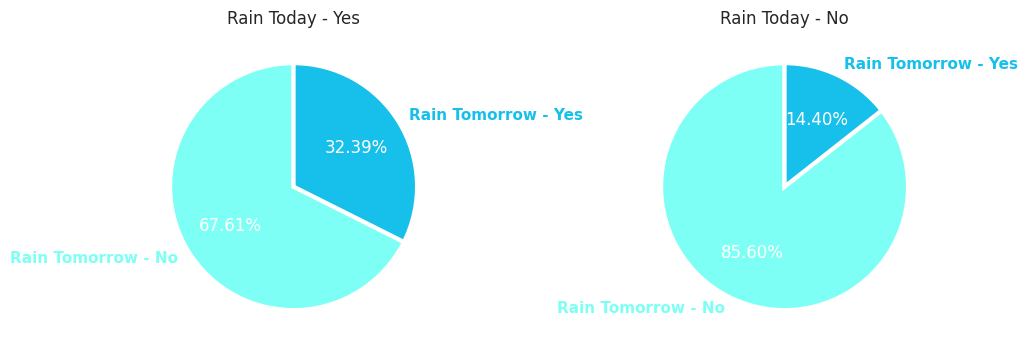

In [ ]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        colors=["#7efff5","#17c0eb"],
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")

plt.tight_layout()
plt.show()

Calculate each location's average rainfall. As it can be seen, Melbourne (highlighted in blue) has the highest rainfall of 0.8+.

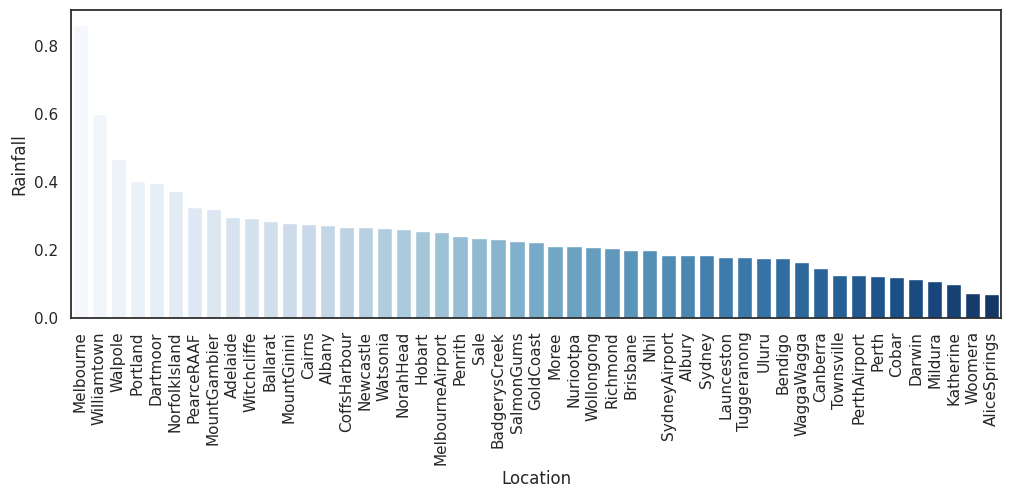

In [24]:
plt.figure(figsize=(12, 4))
avg_rainfall = df.groupby("Location").Rainfall.mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_rainfall, x="Location", y="Rainfall", palette="Blues")
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.legend([], [], frameon=False)
plt.show()

# Data Preprocessing

Split the dataframe into training and testing sets with a ratio of 70:30.

In [25]:
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (76879, 14)
X_test shape:  (32949, 14)
y_train shape:  (76879,)
y_test shape:  (32949,)


We'll use *Target Encder* to convert categorical features into numerical faetures, with these method we can handle the high cardinality of the categorical features.

In [26]:
from sklearn.preprocessing import TargetEncoder
cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = X_train.columns[X_train.dtypes != object]

X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

encoder = TargetEncoder()
X_train_prep[cat_cols] = encoder.fit_transform(X_train[cat_cols],y_train)
X_test_prep[cat_cols] = encoder.transform(X_test[cat_cols])
X_train_prep.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday
77131,0.259972,15.2,25.8,0.0,0.103914,31.0,0.133321,0.121971,74.0,60.0,1019.4,1016.1,24.1,0.144257
58918,0.143587,17.3,32.6,0.2,0.201506,37.0,0.170762,0.171602,56.0,34.0,1009.0,1005.7,31.8,0.143832
5781,0.145953,9.7,20.7,0.0,0.208581,50.0,0.174431,0.202706,53.0,47.0,1006.4,1006.3,19.1,0.144257
37450,0.135170,4.4,12.7,0.4,0.203126,30.0,0.181244,0.135399,91.0,56.0,1009.7,1007.1,12.1,0.144033
10628,0.209040,12.0,22.5,0.0,0.145398,35.0,0.246047,0.145156,67.0,71.0,1025.2,1022.1,20.4,0.144257


Due to all featues have different scales, we'll standardize them with *StandardScaler()*.

In [27]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_prep)
scaled_X_test = scaler.transform(X_test_prep)

# Models Definition & Training

Create a logistic regression model and train it with the training dataset. In this case, the parameter *class_weight = balanced* is used to deal with class imbalance by giving different weights to both the majority and minority classes.

In [28]:
log_model = LogisticRegression(class_weight="balanced",random_state=42)
log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

Create an SVM model and train it with the training dataset. The parameter *class_weight = balanced* is used as well.

In [29]:
svm_model = SVC(class_weight="balanced",random_state=42)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=42)

# Models Evaluation

Evaluate the logistic regression model.

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

y_pred_log = log_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

          No       0.94      0.76      0.84     27815
         Yes       0.36      0.72      0.48      5134

    accuracy                           0.75     32949
   macro avg       0.65      0.74      0.66     32949
weighted avg       0.85      0.75      0.78     32949



based on the classification report, the model is not good at predicting the minority class (Rain Tomorrow - Yes). The recall score for the minority class is 0.36 which is not good. The model is good at predicting the majority class (Rain Tomorrow - No) with a recall score of 0.76. F1 score macro for this models is 0.66 with an accuracy of 0.75

Evaluate the SVM model.

In [31]:
y_pred = svm_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.94      0.78      0.86     27815
         Yes       0.39      0.75      0.51      5134

    accuracy                           0.78     32949
   macro avg       0.67      0.76      0.68     32949
weighted avg       0.86      0.78      0.80     32949



if we compare with LogisticRegression Model, SVM model is more better in each metrics.

After each model has been evaluated, it's time to compare the results. Let's check the percentages of correct and incorrect predictions of both models.

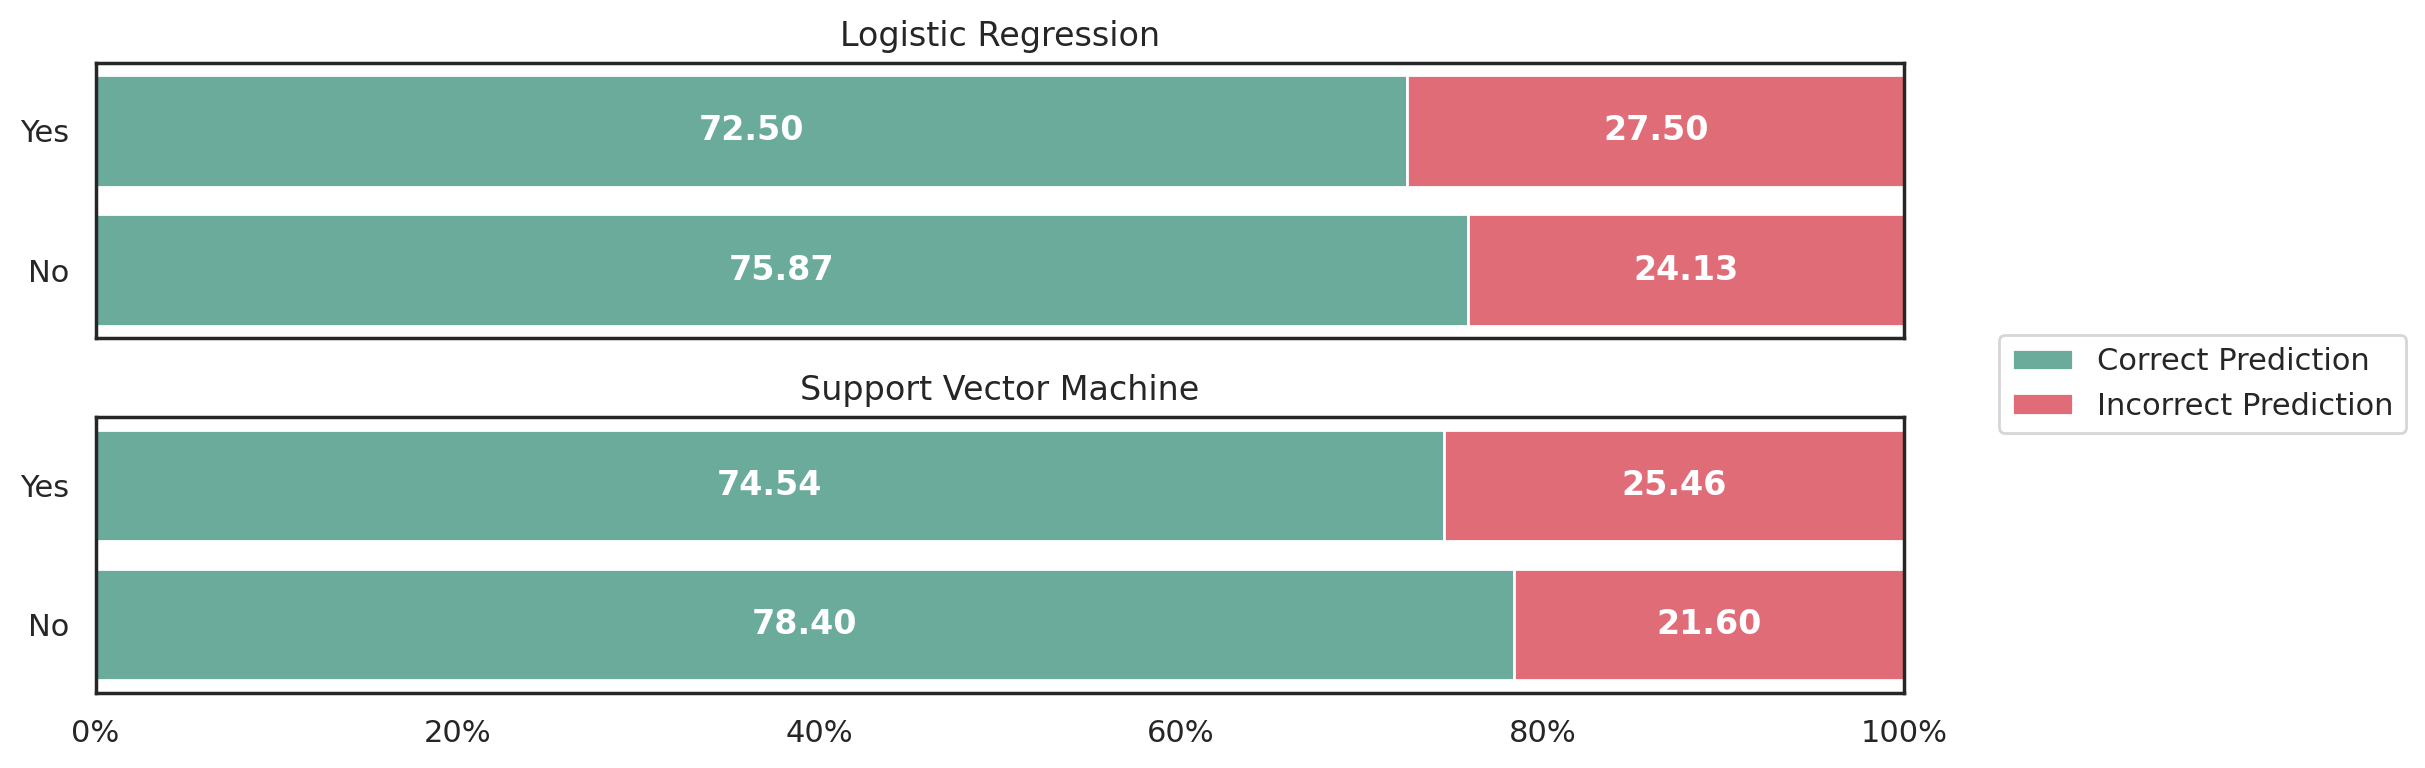

In [32]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),[y_pred_log,y_pred],["Logistic Regression","Support Vector Machine"]):
    true_yes = confusion_matrix(y_test,j)[1,1]
    false_yes = confusion_matrix(y_test,j)[1,0]
    true_no = confusion_matrix(y_test,j)[0,0]
    false_no = confusion_matrix(y_test,j)[0,1]

    ax[i].barh("No",true_no / (true_no + false_no) * 100,color="#6AAB9C",label="Correct Prediction")
    ax[i].barh("No",false_no / (true_no + false_no) * 100,left=true_no / (true_no + false_no) * 100,color="#E06C78",label="Incorrect Prediction")
    ax[i].barh("Yes",true_yes / (true_yes + false_yes) * 100,color="#6AAB9C")
    ax[i].barh("Yes",false_yes / (true_yes + false_yes) * 100,left=true_yes / (true_yes + false_yes) * 100,color="#E06C78")

    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    for container in ax[i].containers:
        ax[i].bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))
handles,labels = ax[i].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(1,0.5),loc="center left")

plt.tight_layout()
plt.show()

Compare both models' performance scores. For *precision_score()*, *recall_score()*, and *f1_score()*, the parameter *average = weighted* is used to account for class imbalance.

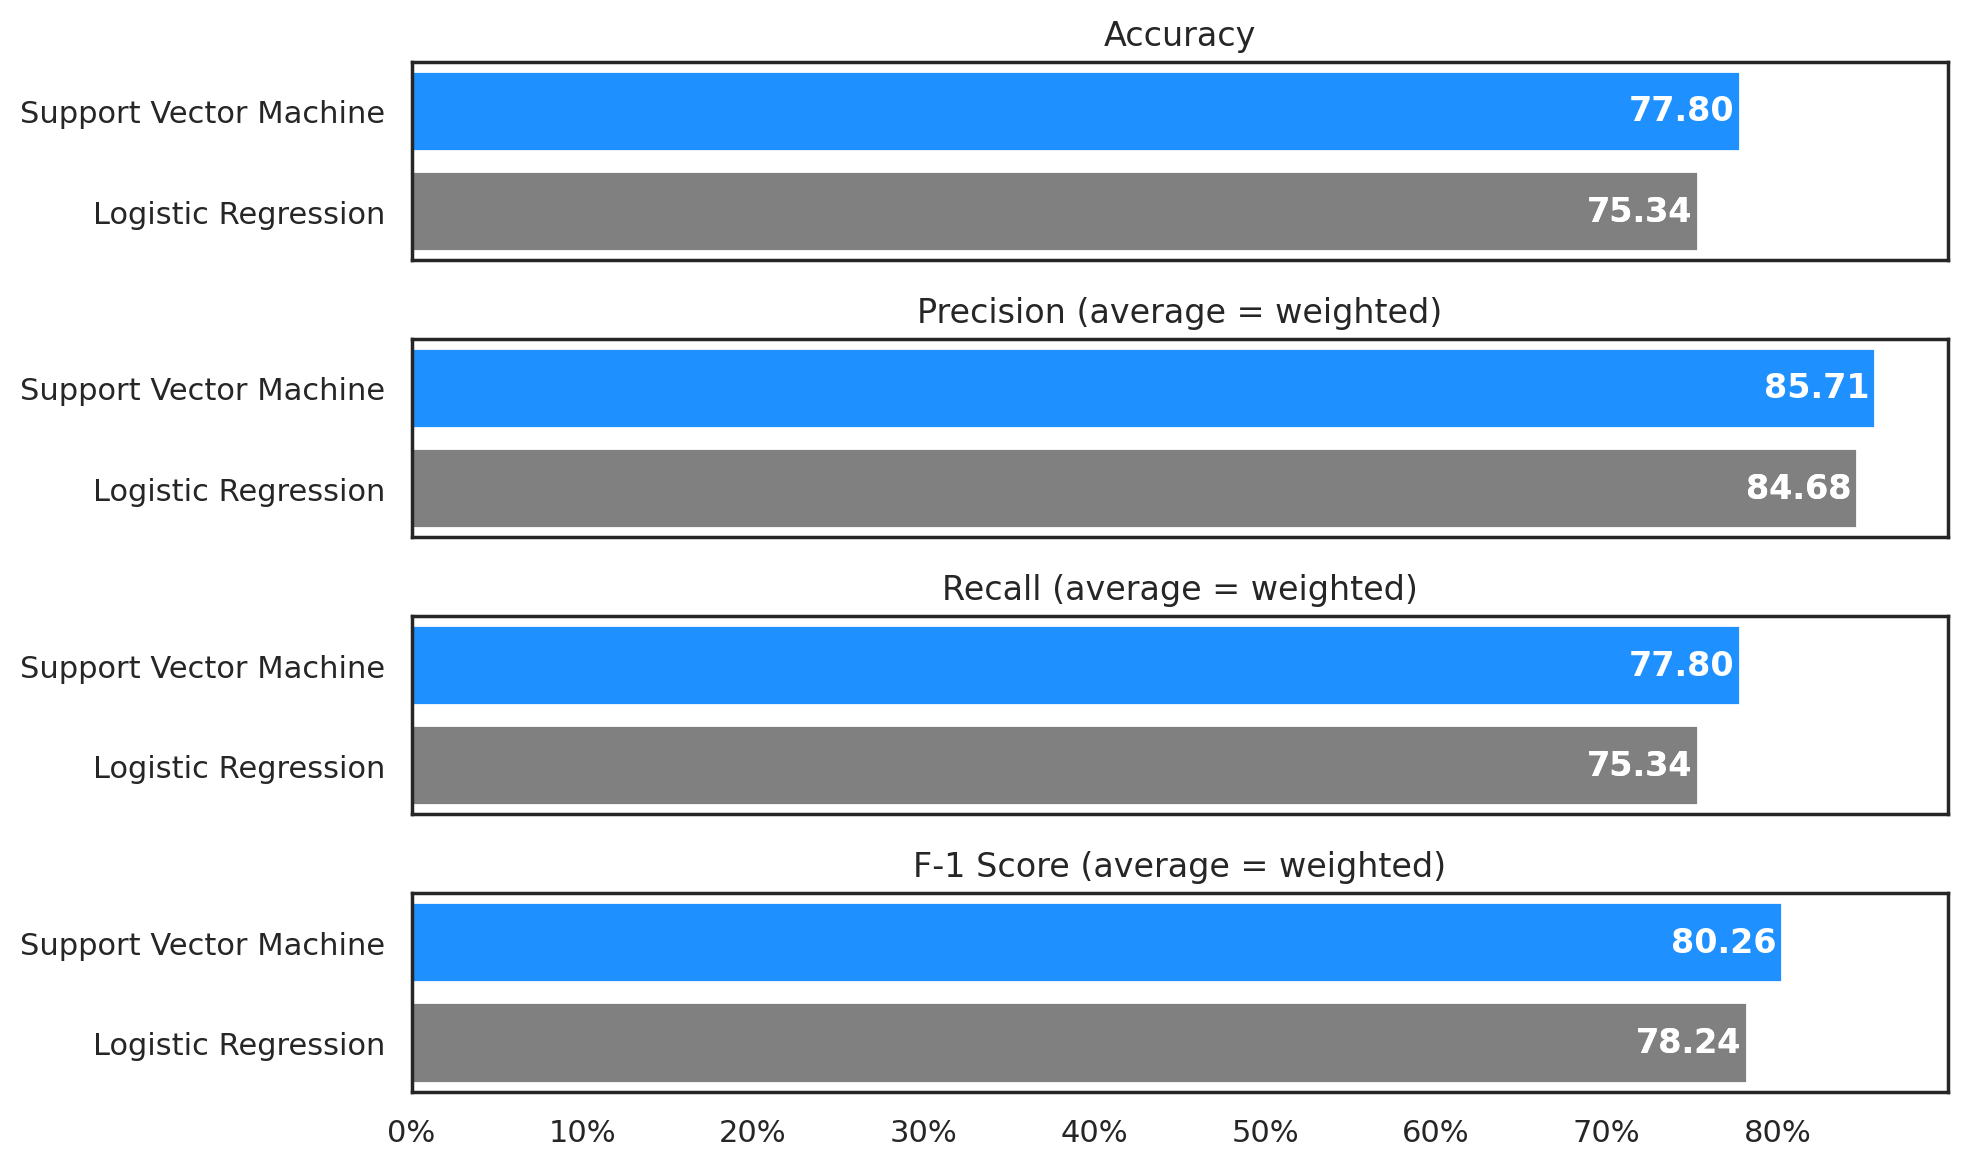

In [33]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [y_pred_log,y_pred],
        ["Logistic Regression","Support Vector Machine"],
        ["grey","dodgerblue"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

# Final Models

Create the final SVM model by training it with the whole dataset. for ease of use we will wrap the preprocessing and modeling into a pipeline,

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

te = TargetEncoder()
scaler = StandardScaler()

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder()),
    ])

preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ])

pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", SVC(class_weight="balanced",random_state=42)),
    ])

svm_model = pipeline.fit(X,y)

In [35]:
pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(class_weight="balanced",random_state=42)),
    ])

log_model = pipeline.fit(X,y)

Create a function for prediction.

Implement the final models by inputting new data.

In [36]:
data = ["Albury",13.4,22.9,0.6,"W",44.0,"W","WNW",71.0,22.0,1007.7,1007.1,21.8,"No"]
data = pd.DataFrame(data).T
data.columns = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir','WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday']

for i in zip([svm_model,log_model],[["Support Vector Machine"],["Logistic Regression"]]):
    print(f"{i[1][0]} Prediction: {i[0].predict(data)[0]}")

Support Vector Machine Prediction: No
Logistic Regression Prediction: No


Save all the final models for future use.

In [37]:
import joblib
joblib.dump(svm_model,"svm_model.pkl")
joblib.dump(log_model,"log_model.pkl")

['log_model.pkl']

# Conclusion

Based on the analysis above, it can be seen that both logistic regression and SVM models handled the class imbalance problem well, which was proven by the high percentages of correct predictions (true *Yes* and true *No*). Furthermore, both models had high scores of ±80% on multiple metrics such as accuracy, precision, recall, and f-1 score. Since the SVM model performed slightly better than the logistic regression model, it's recommended to use the former one. Hence, it can be concluded that the SVM model is the best model to predict rain in Australia and can be used for future use.